In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sciplotlib.polish as splpolish
import sciplotlib.style as splstyle
import itertools 
import pdb


# Plotly plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.tools as tls
username = 'Timothysit' # your username
api_key = 'w6failNyECNN0yv6TJS8' # your api key - go to profile > settings > regenerate key
tls.set_credentials_file(username=username, api_key=api_key)
import chart_studio.plotly as py

In [60]:
network_features_df = pd.read_csv('/home/timsit/mecp2/data/mecp2/All_results_fr_netwBursts_fc_graph.csv')

# Look at distrubution of each metric

In [36]:
def pairplot(df, cols, group_col=None, fig=None, axs=None):
    
    if type(cols) is list:
        cols = np.array(cols)
    n_cols = len(cols)
    if fig is None and axs is None:
        fig, axs = plt.subplots(n_cols, n_cols)
        fig.set_size_inches(8, 8)
    
    
    for feat_x, feat_y in itertools.product(cols, cols):
    
        
        x_loc = np.where(cols == feat_x)[0][0]
        y_loc = np.where(cols == feat_y)[0][0]
        
        if feat_x == feat_y:
            axs[x_loc, y_loc].hist(df[feat_x])
        else:
            axs[x_loc, y_loc].scatter(df[feat_x], df[feat_y])
    
    
    return fig, axs
    
    
    

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

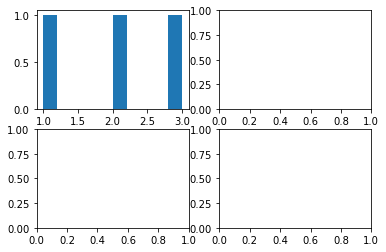

In [32]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist([1, 2, 3])

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


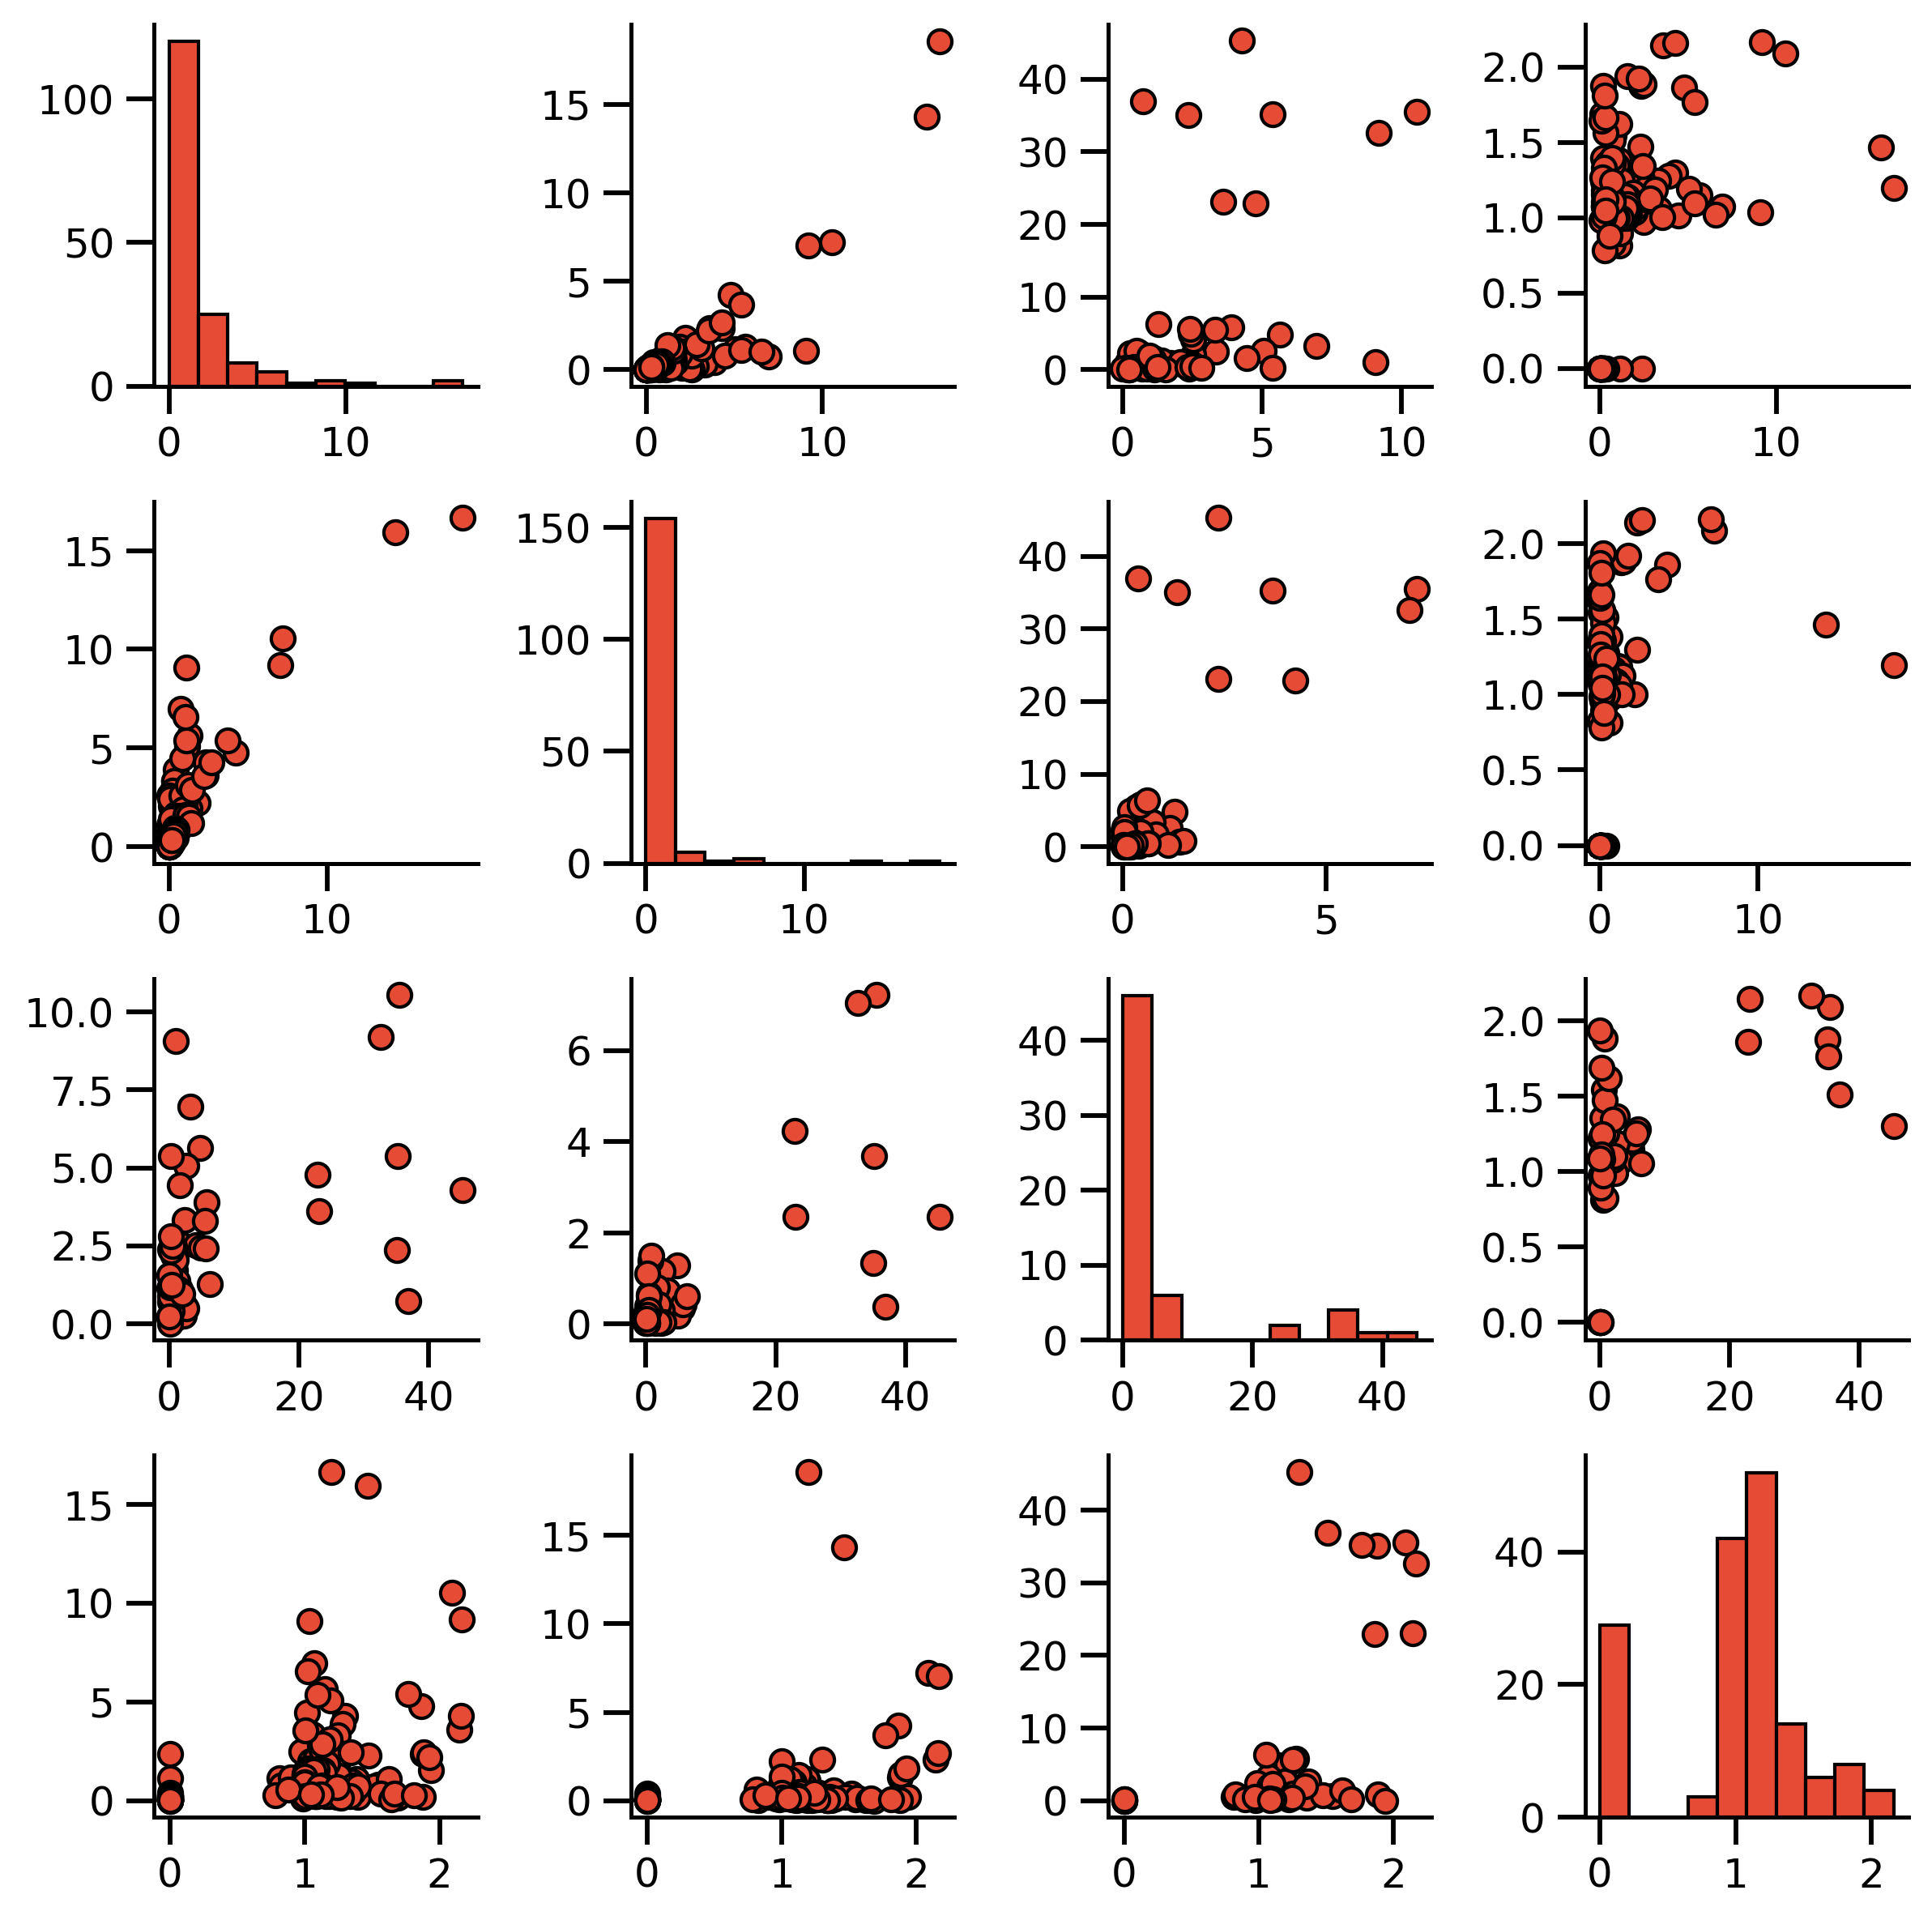

In [39]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, axs = pairplot(network_features_df, cols=['mean_FR', 'median_FR', 'meanDegree', 'SW2'])
    fig.tight_layout()

# Look at correlations between metrics

In [42]:
network_features_df.iloc[0]

Culture                       MPT190403_2B
Age                                  DIV14
DIV                                     14
Genotype                                HE
mean_FR                              0.802
median_FR                             0.08
Total_FR                             6.416
N_active_Es                              8
meanSTTC                             0.064
skewSTTC                        -0.0338575
netw_density                      0.210526
meanDegree                        0.663158
skewDegree                         1.04245
netw_size                          1.42105
CC1                                      1
PL1                                      1
GE1                                      1
SW1                                      1
RC1                                      1
BC1                                      1
CC2                                1.51446
PL2                               0.979689
GE2                                1.00663
SW2        

In [61]:
df_subset_col = ['mean_FR', 'median_FR', 'Total_FR',
                'N_active_Es', 'meanSTTC', 'skewSTTC',
                'netw_density', 'meanDegree', 'skewDegree',
                'netw_size', 'CC1', 'PL1', 'GE1', 'SW1', 'RC1',
                'BC1', 'CC2', 'PL2', 'GE2', 'SW2', 'RC2', 'BC2',
                'GEraw']

network_features_df_subset = network_features_df[df_subset_col]
network_features_df_subset_corr = network_features_df_subset.corr(method='pearson')

In [256]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_correlation_between_features_all_genotype_culture'

# fig = go.Figure(data=go.Heatmap(network_features_df_subset_corr))
width = 600
fig = px.imshow(network_features_df_subset_corr, 
                zmin=-1, zmax=1, aspect='equal',
               labels={'color': 'correlation'},
               color_continuous_scale='RdBu_r',
               width=width, height=width)
fig.show()

if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

# Look at each metric across genotype and days

In [141]:
network_burst_data

,Culture,Age,DIV,Genotype,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
0,MPT190403_2B,DIV14,14,HE,0.802,0.080,6.416,8,0.064,-0.033857,...,1.545854,1.242236,1.286333,NaN,NaN,NaN,NaN,NaN,5.0,0.767857
1,MPT190403_2B,DIV21,21,HE,4.281,2.344,252.579,59,0.727,-0.495449,...,1.300083,1.428571,1.584845,1.416458,5.457,6.189,26.917,0.903,28.0,0.830918
2,MPT190403_2B,DIV28,28,HE,2.363,1.333,137.054,58,0.581,0.233595,...,1.876128,1.666667,1.831973,2.176940,9.775,6.031,38.750,0.777,25.0,0.730957
3,MPT190403_2B,DIV35,35,HE,0.740,0.383,42.920,58,0.610,-0.405029,...,1.513623,1.428571,1.637018,1.537447,29.669,4.449,3.167,0.703,24.0,0.780896
4,MPT190403_6B,DIV14,14,WT,1.719,0.721,22.347,13,0.047,0.389426,...,1.203143,1.273885,1.187366,3.097800,44.663,1.405,0.833,0.024,8.0,0.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,MPT200209_8A,DIV35,35,WT,0.679,0.428,6.790,10,0.098,NaN,...,1.238823,1.204819,1.192834,NaN,NaN,NaN,NaN,NaN,8.0,0.855556
160,MPT200209_8B,DIV14,14,WT,0.034,0.018,0.272,8,0.004,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
161,MPT200209_8B,DIV21,21,WT,0.559,0.290,4.472,8,0.086,NaN,...,0.878108,1.069519,0.785661,NaN,NaN,NaN,NaN,NaN,6.0,0.761905
162,MPT200209_8B,DIV28,28,WT,0.311,0.186,4.043,13,0.125,NaN,...,1.120077,1.111111,1.131619,NaN,NaN,NaN,NaN,NaN,11.0,0.876068


In [14]:
div_gene_grouped_df = network_burst_data.groupby(['DIV', 'Genotype']).agg('mean').reset_index()

In [16]:
div_gene_grouped_df

,DIV,Genotype,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,netw_density,meanDegree,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
0,14,HE,2.548643,1.479643,84.374214,13.857143,0.116000,0.196179,0.247190,0.846260,...,1.222928,1.124531,1.096644,2.172229,28.551500,3.349333,66.604000,0.327500,8.357143,0.731181
1,14,KO,0.728583,0.195833,4.821583,5.416667,0.013500,0.412920,0.000000,0.000000,...,0.419564,0.459570,0.445364,2.611000,91.991000,NaN,0.083000,0.004000,2.300000,0.325913
2,14,WT,1.579333,0.670600,40.897200,14.733333,0.107267,0.444296,0.254127,3.090049,...,0.921784,1.023740,1.071338,2.334464,25.193600,1.713800,28.283200,0.230600,8.000000,0.619180
3,21,HE,1.964643,0.564857,53.051429,23.928571,0.220571,0.021711,0.415097,10.179618,...,1.147100,1.188640,1.235930,2.173258,51.999111,2.575889,14.398111,0.388667,14.785714,0.816547
4,21,KO,0.462917,0.107083,5.778667,8.333333,0.045167,0.311269,0.069549,0.223684,...,0.621044,0.675681,0.712234,2.131750,72.249500,0.822000,5.916500,0.245500,5.500000,0.473328
5,21,WT,1.996733,1.009600,58.833267,15.133333,0.193867,0.222473,0.428438,5.459572,...,1.192802,1.175308,1.240541,2.227299,57.369250,1.598857,39.895875,0.322750,10.133333,0.855633
6,28,HE,1.120714,0.409071,26.246500,18.857143,0.187000,0.206111,0.468958,8.776756,...,1.094329,1.090579,1.203469,2.311273,82.541818,1.310818,9.621273,0.255727,11.928571,0.788603
7,28,KO,0.580833,0.361750,16.347167,13.666667,0.092250,0.689897,0.070175,0.175439,...,0.681937,0.618150,0.599697,1.901153,34.655667,1.682000,22.166667,0.378333,7.000000,0.417872
8,28,WT,2.102400,1.089933,80.211333,24.533333,0.200533,0.692435,0.353247,8.157080,...,1.286726,1.246103,1.314306,2.414942,61.558900,1.221400,20.800000,0.289900,12.733333,0.817321
9,35,HE,2.142643,1.612786,88.957571,27.357143,0.231000,0.407116,0.394889,9.493963,...,1.150185,1.109567,1.173472,2.239711,75.273462,1.271385,6.987000,0.290385,15.214286,0.776461


[]

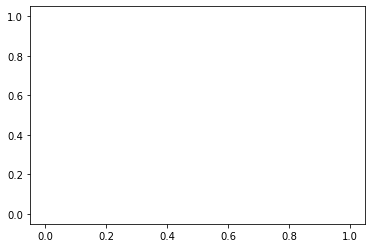

In [15]:
fig, ax = plt.subplots()
ax.plot()

# Classification of genotype based on metrics, for each DIV

### Plot a single metric across days

In [255]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_fr_over_days'

wt_network_burst_data = network_burst_data.loc[
    network_burst_data['Genotype'] == 'WT'
]

ko_network_burst_data = network_burst_data.loc[
    network_burst_data['Genotype'] == 'KO'
]

he_network_burst_data = network_burst_data.loc[
    network_burst_data['Genotype'] == 'HE'
]

wt_mean_feature = wt_network_burst_data.groupby('DIV').agg('mean')['mean_FR']
ko_mean_feature = ko_network_burst_data.groupby('DIV').agg('mean')['mean_FR']
he_mean_feature = he_network_burst_data.groupby('DIV').agg('mean')['mean_FR']

fig = go.Figure()
fig.add_trace(go.Scatter(x=wt_network_burst_data['DIV'],
                         y=wt_network_burst_data['mean_FR'],
                         opacity=0.5,
                         line=dict(color='gray'),
                         name='WT individuals'
                        )
             )

fig.add_trace(go.Scatter(x=ko_network_burst_data['DIV'],
                         y=ko_network_burst_data['mean_FR'],
                         opacity=0.5,
                         line=dict(color='red'),
                        name='KO individuals'
                        )
             )

fig.add_trace(go.Scatter(x=he_network_burst_data['DIV'],
                         y=he_network_burst_data['mean_FR'],
                         opacity=0.5,
                         line=dict(color='orange'),
                         name='HE individuals')
             )


# Plot the means 

fig.add_trace(go.Scatter(x=wt_mean_feature.index,
                         y=wt_mean_feature,
                         opacity=1.0,
                         line=dict(color='gray', width=3),
                         name='WT mean')
             )


fig.add_trace(go.Scatter(x=ko_mean_feature.index,
                         y=ko_mean_feature,
                         opacity=1.0,
                         line=dict(color='red', width=3),
                        name='KO mean')
             )

fig.add_trace(go.Scatter(x=he_mean_feature.index,
                         y=he_mean_feature,
                         opacity=1.0,
                         line=dict(color='orange', width=3),
                         name='HE mean')
             )


# Overall figure settings 
fig.update_layout(title='Firing rate across electrodes over days',
                   xaxis_title='Days in vitro (DIV)',
                   yaxis_title='Mean firing rate',
                  width=800, height=500,
                  template='plotly_white')


if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

### Look at how many cultures there are for each genotype

,DIV,Genotype,Culture,Age,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
0,14,HE,14,14,14,14,14,14,14,5,...,14,14,14,4,4,3,4,4,14,14
1,14,KO,12,12,12,12,12,12,12,1,...,10,10,10,1,1,0,1,1,10,10
2,14,WT,15,15,15,15,15,15,15,9,...,14,14,14,5,5,5,5,5,14,14
3,21,HE,14,14,14,14,14,14,14,5,...,14,14,14,9,9,9,9,9,14,14
4,21,KO,12,12,12,12,12,12,12,1,...,10,10,10,2,2,2,2,2,10,10
5,21,WT,15,15,15,15,15,15,15,9,...,15,15,13,8,8,7,8,8,15,15
6,28,HE,14,14,14,14,14,14,14,5,...,14,14,14,11,11,11,11,11,14,14
7,28,KO,12,12,12,12,12,12,12,1,...,12,12,12,3,3,3,3,3,12,12
8,28,WT,15,15,15,15,15,15,15,9,...,15,15,14,10,10,10,10,10,15,15
9,35,HE,14,14,14,14,14,14,14,5,...,14,14,14,13,13,13,13,13,14,14


In [214]:
culture_count_genotype_df

,DIV,Genotype,Culture,Age,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
2,14,WT,15,15,15,15,15,15,15,9,...,14,14,14,5,5,5,5,5,14,14
5,21,WT,15,15,15,15,15,15,15,9,...,15,15,13,8,8,7,8,8,15,15
8,28,WT,15,15,15,15,15,15,15,9,...,15,15,14,10,10,10,10,10,15,15
11,35,WT,15,15,15,15,15,15,15,9,...,15,15,13,8,8,8,8,8,15,15


In [252]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_num_culture_per_genotype'


fig = go.Figure()

genotype_color = {'WT': 'gray', 'HE': 'orange', 'KO': 'red'}
culture_count_df = network_burst_data.groupby(['DIV', 'Genotype']).agg('count').reset_index()
wt_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'WT'
]

ko_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'KO'
]

he_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'HE'
]

for genotype in np.unique(culture_count_df['Genotype']):

    culture_count_genotype_df = culture_count_df.loc[
        culture_count_df['Genotype'] == genotype
    ]

    fig.add_trace(go.Scatter(x=culture_count_genotype_df['DIV'],
                             y=culture_count_genotype_df['median_FR'],
                             opacity=1.0,
                             line=dict(color=genotype_color[genotype]),
                             name='%s' % genotype
                            )
                 )

# one button for each df column
updatemenu= []
buttons=[]
for col in culture_count_df.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        args=[{'x': [culture_count_genotype_df['DIV'],
                                    culture_count_genotype_df['DIV'],
                                    culture_count_genotype_df['DIV']],
                               'y':[wt_culture_count_df[col].values,
                                   ko_culture_count_df[col].values,
                                   he_culture_count_df[col].values]}])
                  )

# some adjustments to the updatemenu
updatemenu=[]
your_menu=dict()
updatemenu.append(your_menu)
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True


# Overall figure settings 
fig.update_layout(title='Number of cultures for each genotype across days',
                   xaxis_title='Days in vitro (DIV)',
                   yaxis_title='Number of cultures',
                  width=800, height=500, 
                  template='plotly_white',
                  updatemenus=updatemenu)
fig.show()


if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

In [253]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_mean_over_each_feature_across_days'

fig = go.Figure()

genotype_color = {'WT': 'gray', 'HE': 'orange', 'KO': 'red'}
culture_count_df = network_burst_data.groupby(['DIV', 'Genotype']).agg('mean').reset_index()
wt_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'WT'
]

ko_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'KO'
]

he_culture_count_df = culture_count_df.loc[
    culture_count_df['Genotype'] == 'HE'
]

for genotype in np.unique(culture_count_df['Genotype']):

    culture_count_genotype_df = culture_count_df.loc[
        culture_count_df['Genotype'] == genotype
    ]

    fig.add_trace(go.Scatter(x=culture_count_genotype_df['DIV'],
                             y=culture_count_genotype_df['median_FR'],
                             opacity=1.0,
                             line=dict(color=genotype_color[genotype]),
                             name='%s' % genotype
                            )
                 )

# one button for each df column
updatemenu= []
buttons=[]
for col in culture_count_df.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        args=[{'x': [culture_count_genotype_df['DIV'],
                                    culture_count_genotype_df['DIV'],
                                    culture_count_genotype_df['DIV']],
                               'y':[wt_culture_count_df[col].values,
                                   ko_culture_count_df[col].values,
                                   he_culture_count_df[col].values],
                               'title': col
                              },
                             ])
                  )

# some adjustments to the updatemenu
updatemenu=[]
your_menu=dict()
updatemenu.append(your_menu)
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True


# Overall figure settings 
fig.update_layout(yaxis_title='Feature value',
                  xaxis_title='Days in vitro (DIV)',
                  title='Mean of features across days',
                  width=800, height=500, 
                  template='plotly_white',
                  updatemenus=updatemenu)
fig.show()


if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

## PCA on the features

In [258]:
network_features_df

,Culture,Age,DIV,Genotype,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
0,MPT190403_2B,DIV14,14,HE,0.802,0.080,6.416,8,0.064,-0.033857,...,1.545854,1.242236,1.286333,NaN,NaN,NaN,NaN,NaN,5.0,0.767857
1,MPT190403_2B,DIV21,21,HE,4.281,2.344,252.579,59,0.727,-0.495449,...,1.300083,1.428571,1.584845,1.416458,5.457,6.189,26.917,0.903,28.0,0.830918
2,MPT190403_2B,DIV28,28,HE,2.363,1.333,137.054,58,0.581,0.233595,...,1.876128,1.666667,1.831973,2.176940,9.775,6.031,38.750,0.777,25.0,0.730957
3,MPT190403_2B,DIV35,35,HE,0.740,0.383,42.920,58,0.610,-0.405029,...,1.513623,1.428571,1.637018,1.537447,29.669,4.449,3.167,0.703,24.0,0.780896
4,MPT190403_6B,DIV14,14,WT,1.719,0.721,22.347,13,0.047,0.389426,...,1.203143,1.273885,1.187366,3.097800,44.663,1.405,0.833,0.024,8.0,0.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,MPT200209_8A,DIV35,35,WT,0.679,0.428,6.790,10,0.098,NaN,...,1.238823,1.204819,1.192834,NaN,NaN,NaN,NaN,NaN,8.0,0.855556
160,MPT200209_8B,DIV14,14,WT,0.034,0.018,0.272,8,0.004,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
161,MPT200209_8B,DIV21,21,WT,0.559,0.290,4.472,8,0.086,NaN,...,0.878108,1.069519,0.785661,NaN,NaN,NaN,NaN,NaN,6.0,0.761905
162,MPT200209_8B,DIV28,28,WT,0.311,0.186,4.043,13,0.125,NaN,...,1.120077,1.111111,1.131619,NaN,NaN,NaN,NaN,NaN,11.0,0.876068


In [260]:
X

,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,netw_density,meanDegree,skewDegree,netw_size,...,SW1,RC1,BC1,CC2,PL2,GE2,SW2,RC2,BC2,GEraw
0,0.802,0.080,6.416,8,0.064,-0.033857,0.210526,0.663158,1.042451,1.421053,...,1.000000,1.000000,1.000000,1.514457,0.979689,1.006633,1.545854,1.242236,1.286333,0.767857
1,4.281,2.344,252.579,59,0.727,-0.495449,0.918594,45.290423,-1.079699,49.894737,...,0.999983,1.000000,1.000000,1.300083,1.000000,1.000000,1.300083,1.428571,1.584845,0.830918
2,2.363,1.333,137.054,58,0.581,0.233595,0.779598,35.076868,-0.325170,42.157895,...,0.999929,1.000000,1.000097,1.876128,1.000000,1.000000,1.876128,1.666667,1.831973,0.730957
3,0.740,0.383,42.920,58,0.610,-0.405029,0.753869,36.912201,-0.545386,42.684211,...,0.999939,1.000000,1.087483,1.514518,1.000591,0.999819,1.513623,1.428571,1.637018,0.780896
4,1.719,0.721,22.347,13,0.047,0.389426,0.193719,0.930075,0.621119,3.210526,...,0.981802,1.111111,1.001988,1.177453,0.978648,1.017505,1.203143,1.273885,1.187366,0.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.679,0.428,6.790,10,0.098,NaN,NaN,NaN,1.068994,2.736842,...,1.000411,1.000000,1.000000,1.238823,1.000000,1.000000,1.238823,1.204819,1.192834,0.855556
160,0.034,0.018,0.272,8,0.004,NaN,NaN,NaN,4.006938,0.157895,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
161,0.559,0.290,4.472,8,0.086,NaN,NaN,NaN,0.030018,2.578947,...,1.007676,1.098901,0.714878,0.955173,1.087763,0.973014,0.878108,1.069519,0.785661,0.761905
162,0.311,0.186,4.043,13,0.125,NaN,NaN,NaN,1.446546,4.421053,...,0.963501,1.000000,1.033627,1.131625,1.010309,0.997567,1.120077,1.111111,1.131619,0.876068


In [286]:
subset_df

,Culture,Age,DIV,Genotype,mean_FR,median_FR,Total_FR,N_active_Es,meanSTTC,skewSTTC,...,SW2,RC2,BC2,mean_ISI_withinNbursts_ms,mean_ISI_outsideNbursts_ms,CVIofNBI,NBurstRate,frac_in_Nburst,num_RC_nodes_mean,GEraw
1,MPT190403_2B,DIV21,21,HE,4.281,2.344,252.579,59,0.727,-0.495449,...,1.300083,1.428571,1.584845,1.416458,5.457,6.189,26.917,0.903,28.0,0.830918
2,MPT190403_2B,DIV28,28,HE,2.363,1.333,137.054,58,0.581,0.233595,...,1.876128,1.666667,1.831973,2.176940,9.775,6.031,38.750,0.777,25.0,0.730957
3,MPT190403_2B,DIV35,35,HE,0.740,0.383,42.920,58,0.610,-0.405029,...,1.513623,1.428571,1.637018,1.537447,29.669,4.449,3.167,0.703,24.0,0.780896
4,MPT190403_6B,DIV14,14,WT,1.719,0.721,22.347,13,0.047,0.389426,...,1.203143,1.273885,1.187366,3.097800,44.663,1.405,0.833,0.024,8.0,0.794872
5,MPT190403_6B,DIV21,21,WT,3.342,0.299,40.104,12,0.156,0.566544,...,1.057662,1.000000,1.147735,2.932713,24.956,1.759,12.500,0.235,9.0,0.916667
6,MPT190403_6B,DIV28,28,WT,5.635,1.277,135.240,24,0.176,-0.234275,...,1.147886,1.197605,0.919430,2.077159,7.440,1.679,39.833,0.343,15.0,0.785903
7,MPT190403_6B,DIV35,35,WT,3.897,0.432,128.601,33,0.165,-0.175483,...,1.278296,1.242236,1.036392,2.038256,7.819,1.540,35.500,0.347,20.0,0.811869
8,MPT190403_6C,DIV14,14,WT,2.520,0.912,25.200,10,0.199,-0.405238,...,1.022583,1.000000,1.010563,2.495493,39.680,1.403,6.250,0.177,9.0,0.933333
9,MPT190403_6C,DIV21,21,WT,2.537,0.331,53.277,21,0.181,-0.063200,...,1.172803,1.111111,1.091134,2.242954,18.852,1.258,23.750,0.407,15.0,0.864912
10,MPT190403_6C,DIV28,28,WT,3.309,0.344,99.270,30,0.166,0.200249,...,1.245101,1.041667,1.560319,2.152376,10.183,1.389,34.583,0.378,11.0,0.823481


In [294]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_PCA_on_feature_matrix_exclude_nans'

import sklearn.decomposition as skldecompose

features_to_use = ['mean_FR', 'median_FR', 'Total_FR',
                    'N_active_Es', 'meanSTTC', 'skewSTTC',
                    'netw_density', 'meanDegree', 'skewDegree',
                    'netw_size', 'CC1', 'PL1', 'GE1', 'SW1', 'RC1',
                    'BC1', 'CC2', 'PL2', 'GE2', 'SW2', 'RC2', 'BC2',
                    'GEraw']


# subset_df = network_features_df[features_to_use]
# subset_df = subset_df.fillna(value=0)

subset_df = network_features_df.dropna()
subset_df = subset_df[features_to_use]

X = subset_df

pca_model = skldecompose.PCA()
pca_model = pca_model.fit(X)

fig = px.scatter(x=np.arange(len(features_to_use)),
                 y=pca_model.explained_variance_ratio_)

fig.update_layout(yaxis_title='Explained variance ratio',
                  xaxis_title='Components',
                  title='PCA on feature matrix across all genotypes and DIV',
                  width=800, height=500, 
                  template='plotly_white')

fig.show()


if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

## Decoding analysis

In [261]:
from sklearn import preprocessing
import sklearn.linear_model as sklinear
import sklearn.model_selection as sklselect
import sklearn.dummy as skldummy
import sklearn 

le = preprocessing.LabelEncoder()
clf = sklearn.svm.LinearSVC()

leave_one_out_splitter = sklselect.LeaveOneOut()

unique_div = pd.unique(network_features_df['DIV'])
features_to_use = ['mean_FR', 'median_FR', 'Total_FR',
                'N_active_Es', 'meanSTTC', 'skewSTTC',
                'netw_density', 'meanDegree', 'skewDegree',
                'netw_size', 'CC1', 'PL1', 'GE1', 'SW1', 'RC1',
                'BC1', 'CC2', 'PL2', 'GE2', 'SW2', 'RC2', 'BC2',
                'GEraw']


features_to_use = ['mean_FR', 'median_FR', 'Total_FR',
                'N_active_Es', 'meanDegree', 'skewDegree',
                'netw_size', 'CC1', 'PL1', 'GE1', 'SW1', 'RC1',
                'BC1', 'CC2', 'PL2', 'GE2', 'SW2', 'RC2', 'BC2',
                'GEraw']

score_per_div = np.zeros(len(unique_div))
score_per_div_dummy = np.zeros(len(unique_div))

dummy_clf = skldummy.DummyClassifier(strategy='uniform')

for n_div, div in enumerate(unique_div):
    div_df = network_features_df.loc[
        network_features_df['DIV'] == div
    ]
    
    div_df = div_df.fillna(value=0)
    
    X = div_df[features_to_use].values
    y = le.fit_transform(div_df['Genotype'])

    scores = sklselect.cross_val_score(clf, X, y, cv=2)
    dummy_scores = sklselect.cross_val_score(dummy_clf, X,y, cv=2)
    
    score_per_div[n_div] = np.mean(scores)
    score_per_div_dummy[n_div] = np.mean(dummy_scores)
    


/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, incr

In [265]:
score_per_div

array([0.48452381, 0.34047619, 0.24285714, 0.29047619])

In [266]:
score_per_div_dummy

array([0.33928571, 0.24404762, 0.29404762, 0.29285714])

In [293]:
export_fig = True
auto_open = True
fig_fname = 'mecp2_decoding_accuracy_across_days'


fig = px.scatter(x=unique_div, y=score_per_div)


fig.add_shape(type='line',
                x0=13,
                y0=0.3,
                x1=36,
                y1=0.3,
                line=dict(color='black', dash='dash'),
                xref='x',
                yref='y'
)

fig.update_layout(yaxis_title='Decoding accuracy',
                  xaxis_title='Days in vitro (DIV)',
                  title='Mean of features across days',
                  width=800, height=500, 
                  template='plotly_white')
fig.show()


if export_fig:
    py.plot(fig, filename=fig_fname, auto_open=auto_open)

In [94]:
y

array([0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2])